# Домашнее задание 4 - Шмаков Владимир, Б04-105

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import scipy.stats as sts

### Задача 1 - Генерация случайных величин с заданной ковариационной матрицей

Разложение Холецкого используется для генерации коррелированных между собой случайных величин. Проще говоря, когда есть какой-то набор независимых случайных величин и ковариационная матрица. Как из этого получить набор случайных величин, имеющих такую ковариационную матрицу ?

Это нужно как для моделирования случайных сигналов и физических процессов, так и в качестве вспомогательного элемента других вычислительных методов (Монте-Карло).
Решение этой задачи делается с помощью разложения Холецкого. Алгоритм заключается в следующем:
1. Осуществить разложение Холецкого ковариационной матрицы: $\boldsymbol{\Sigma}=\mathbf{A} \mathbf{A}^T$
2. Сгенерировать случайный вектор $\mathbf{z}$, компонентами которого являются независимые случайные величины с нормальным распределением

3. Решением поставленной задачи будет вектор:
$$
\mathbf{x}=\mathbf{m}+\mathbf{A} \mathbf{z}
$$
Здесь $\mathbf{m}$ - это постоянный вектор, составленный из математических ожиданий компонент вектора $\mathbf{z}$.

Напишите функцию, которая в качестве входного параметра берёт ковариационную матрицу, а возвращает набор случайных величин, действуя по описанному выше алгоритму.

Сравните скорость работы вашей функции со встроенной библиотечной реализацией, как тут [Работа со случайными величинами.](https://miptstats.github.io/courses/python/07_random.html)



In [7]:
def random_values(cov: np.ndarray, length = int(1e5), distribution = sts.norm(loc = 1, scale = 1)):
    try:
        A = np.linalg.cholesky(cov)
    except:
        raise "not good matrix"
    z = distribution.rvs(size = (cov.shape[0], length))
    m = np.ones_like(z) * distribution.mean()
    x = m + A @ z
    return x
    

Text(0.5, 1.0, 'оценка методом np.cov')

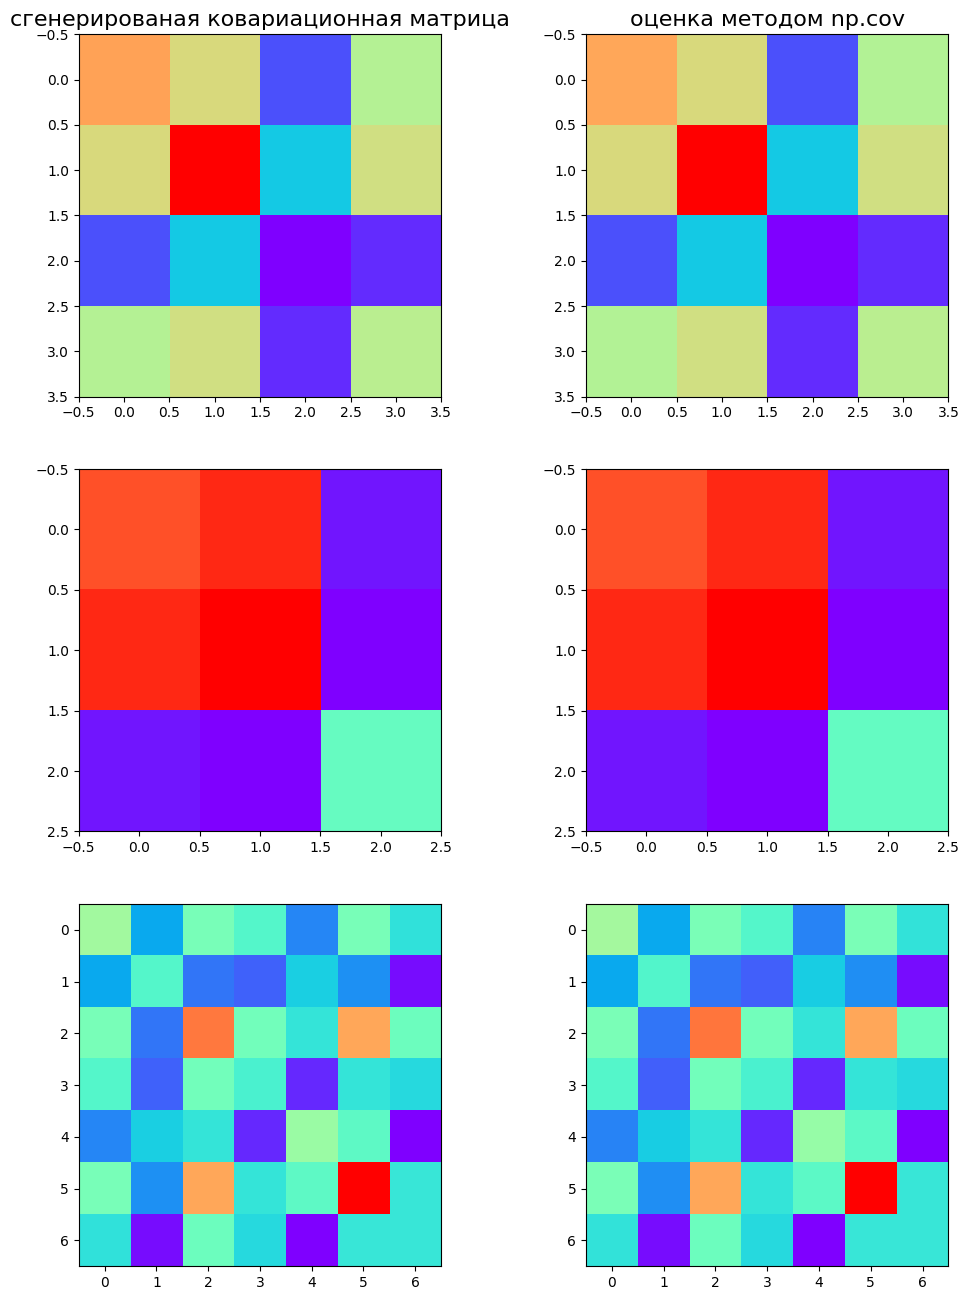

In [16]:
experiments_num = 3

fig, ax = plt.subplots(experiments_num, 2, figsize = (12, 16))

for experiment in range(experiments_num):
    N = np.random.randint(2, 10)
    cov = np.random.rand(N, N)
    cov = cov @ cov.T 
    x = random_values(cov)
    ax[experiment, 0].imshow(cov, cmap = cm.rainbow)
    ax[experiment, 1].imshow(np.cov(x), cmap = cm.rainbow)

ax[0, 0].set_title("сгенерированая ковариационная матрица", fontsize = 16)
ax[0, 1].set_title('оценка методом np.cov', fontsize = 16)
       

In [8]:
cov_matrix = np.array([[2, -0.5], [-0.5, 1]])
x = random_values(cov_matrix, length = int(1e6))
print(x.shape)

(2, 1000000)


In [9]:
print(np.cov(x))

[[ 1.99626328 -0.49680346]
 [-0.49680346  0.99932192]]


### Задача 2 - обрработка данных

Обработка экспериметнальных данных может быть найдена на гитхабе: https://github.com/ShmakovVladimir/Labs

__Прямая с шумом__


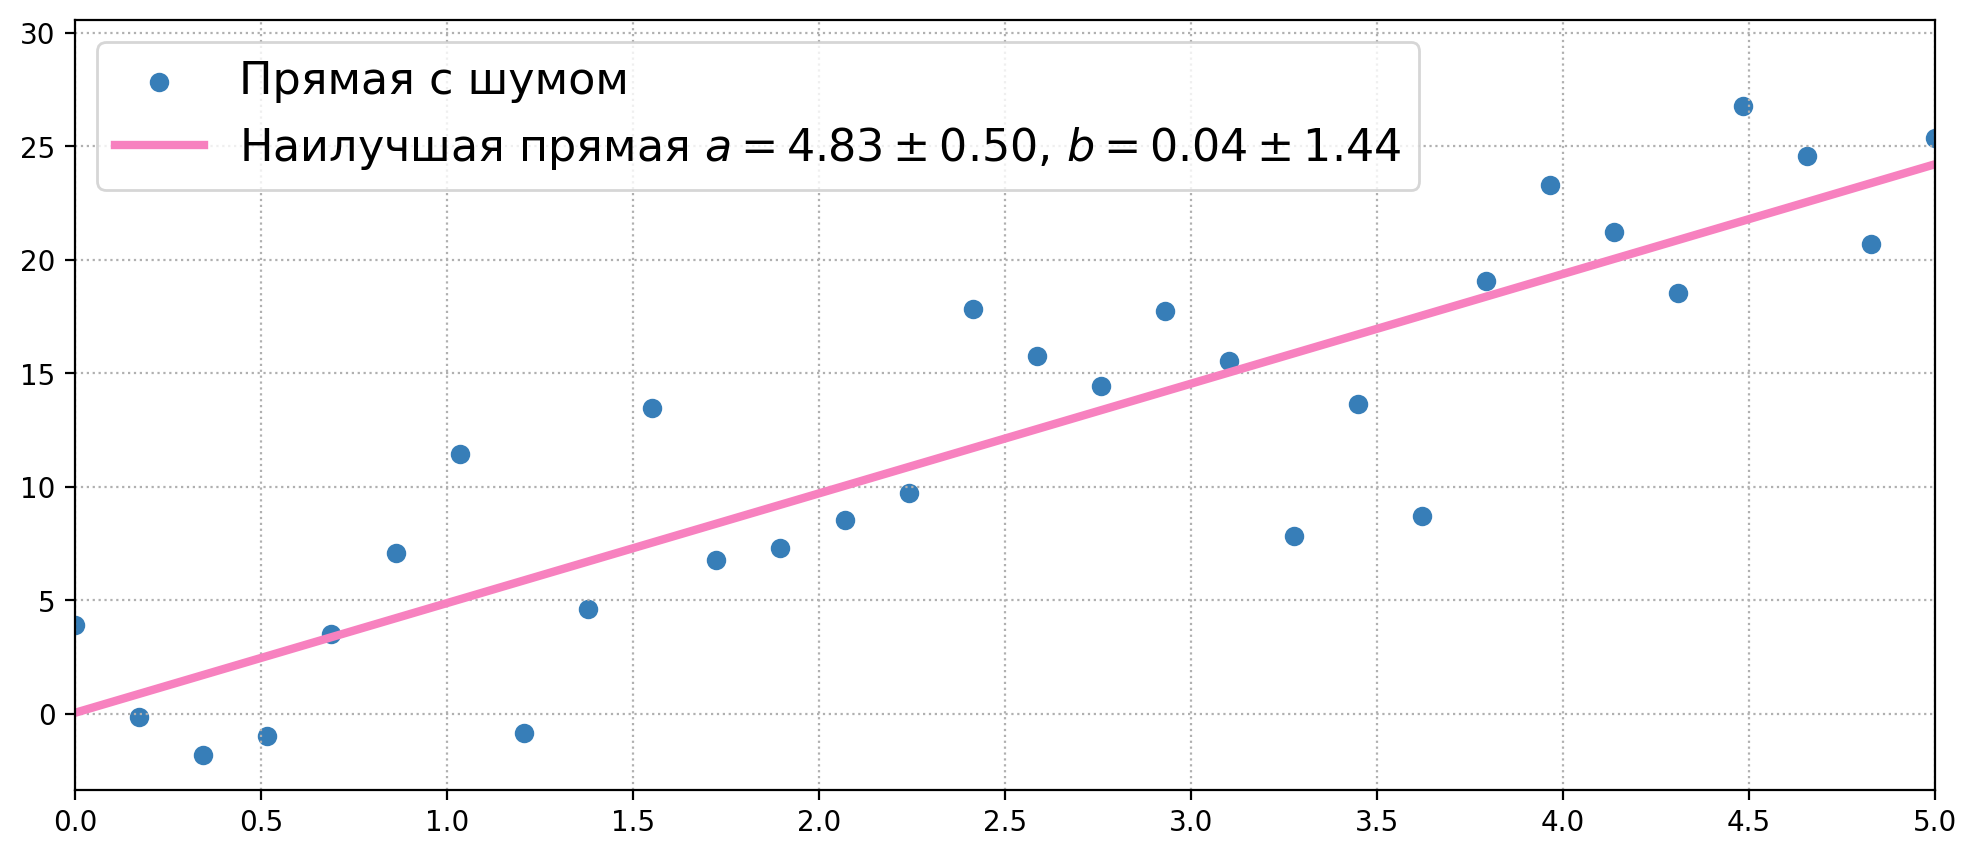

In [75]:
x = np.linspace(0, 5, 30)
y = 5 * x + sts.norm(loc = 0, scale = 4).rvs(x.shape)
x_line = np.linspace(0, 6, 1000)
MNK = sts.linregress(x, y)

plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(x, y, label = 'Прямая с шумом', color = cm.Set1(0.2))

plt.plot(x_line, 
         MNK.intercept + MNK.slope * x_line, 
         color = cm.Set1(0.8), 
         linewidth = 3,
         label = f'Наилучшая прямая $a = {MNK.slope:.2f} \pm {MNK.stderr:.2f}$, $b = {MNK.intercept:.2f} \pm {MNK.intercept_stderr:.2f}$')
plt.legend(fontsize = 16, loc = 'upper left')
plt.grid(ls = ':')
plt.xticks(np.arange(0, 5.5, 0.5))
plt.xlim(0, 5);